# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [145]:
m = 1
A = 0.13#0.11249999999999999#0.09#0.1525#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

twod=true
zeroformat=false

false

In [146]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [147]:
global compactified=true
global loggrid=true

global bisection=true

true

In [148]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [149]:
iter=1
"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio$iter.csv"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio1.csv"

In [150]:
print(N)

200.0

In [151]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [152]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [153]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

"""if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;""";

step size is  0.005
the time step is 0.0005


# Initial data of m β Ψ and Ψ,x

In [154]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [155]:
"""derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
eval1 = derpsi_func(inverse(initX1))

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
eval2 = derpsi_func(initX1)


plot([(initX1) initX1 initX1] , [eval1 eval2 state_array[4:L-3,4]])""";

In [156]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [157]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [158]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

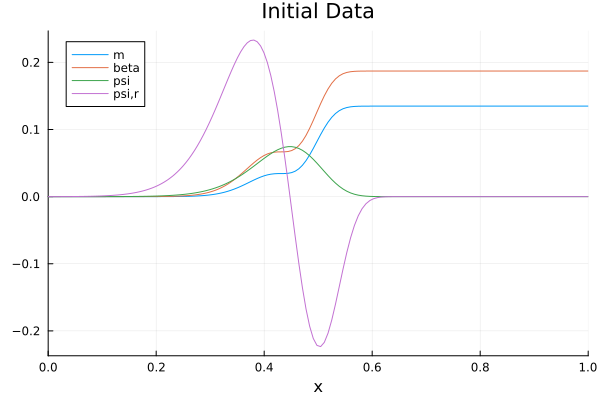

In [159]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [160]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [161]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, state_array[:,1:5],res,"w")

In [162]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [163]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

0.06168851560021275


In [164]:
using Base.Threads
Threads.nthreads()

4

In [165]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [166]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 3.0844257800106374e-5, t=3.0844257800106374e-5 speed is 0.4999691581204159, dx/dt=162.10472731759998


iteration 1001 dt is 3.084425780010643e-5, t=0.030875102057906393 speed is 0.49996915812041504, dx/dt=162.1047273175997


iteration 2000 dt is 3.084425780010648e-5, t=0.06168851560021598 speed is 0.4999691581204142, dx/dt=162.1047273175994
 monitor ratio is 0.2255808313623438

iteration 2001 dt is 3.084425780010648e-5, t=0.06171935985801609 speed is 0.4999691581204142, dx/dt=162.1047273175994


iteration 3001 dt is 3.084425780010736e-5, t=0.09256361765811907 speed is 0.4999691581204, dx/dt=162.1047273175948


iteration 4000 dt is 3.0844257800115956e-5, t=0.12337703120042837 speed is 0.4999691581202606, dx/dt=162.10472731754962
 monitor ratio is 0.23262187700280607

iteration 4001 dt is 3.084425780011598e-5, t=0.12340787545822848 speed is 0.49996915812026016, dx/dt=162.10472731754948


iteration 5001 dt is 3.084425780017821e-5, t=0.15425213325836534 speed is 0.49996



iteration 41001 dt is 1.5584529279681008e-5, t=1.0873688001075823 speed is 0.9895183440204558, dx/dt=320.8309927280872


iteration 42000 dt is 1.6640796796685286e-5, t=1.1034327767723464 speed is 0.926709086925455, dx/dt=300.466381573505
 monitor ratio is 0.6079784000951985

iteration 42001 dt is 1.6642053436966485e-5, t=1.1034494188257833 speed is 0.9266391111876654, dx/dt=300.44369337822536


iteration 43001 dt is 1.8096482844110344e-5, t=1.1207867380415957 speed is 0.8521643535935609, dx/dt=276.2967833623699


iteration 44000 dt is 1.9924285465467495e-5, t=1.1397496313445183 speed is 0.7739889910680127, dx/dt=250.95002822891357
 monitor ratio is 0.44374655775505206

iteration 44001 dt is 1.992628679465905e-5, t=1.139769557631313 speed is 0.7739112542183061, dx/dt=250.9248236525521


iteration 45001 dt is 2.2066078996685555e-5, t=1.1607446000485135 speed is 0.6988635184114315, dx/dt=226.59213722342912


iteration 46000 dt is 2.4401149974313227e-5, t=1.183946838944532 speed is 0.631



iteration 83001 dt is 2.9262895347645434e-11, t=1.4129931861069556 speed is 526987.4160421751, dx/dt=1.7086484234043208e8


iteration 84000 dt is 1.540562829435626e-11, t=1.4129932076620948 speed is 1.0010093266249773e6, dx/dt=3.245567077476297e8
 monitor ratio is 0.9669097873671963

iteration 84001 dt is 1.539580139538962e-11, t=1.4129932076774907 speed is 1.0016482552045803e6, dx/dt=3.247638672123482e8


iteration 85001 dt is 8.171175548387248e-12, t=1.412993219070164 speed is 1.8872654875481103e6, dx/dt=6.119070591974804e8


iteration 86000 dt is 4.375640195582752e-12, t=1.4129932251347783 speed is 3.524324879531017e6, dx/dt=1.1426899325606217e9
 monitor ratio is 0.9669183659041706

iteration 86001 dt is 4.372926242007199e-12, t=1.4129932251391513 speed is 3.52651216867766e6, dx/dt=1.1433991161270926e9


iteration 87001 dt is 2.3610570892474994e-12, t=1.4129932284002682 speed is 6.531471718916883e6, dx/dt=2.1176955113751898e9


iteration 88000 dt is 1.286920219555036e-12, t=1.4129

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/anim_res1.gif")
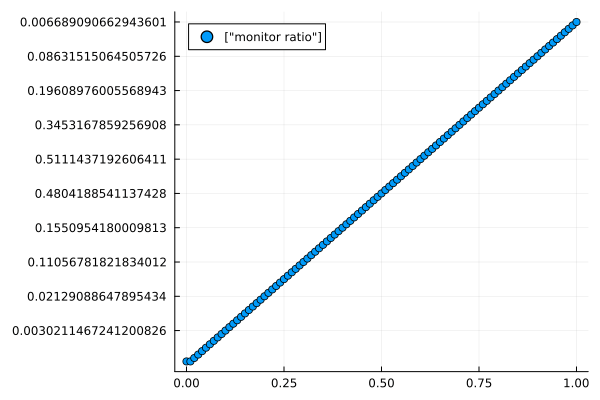

In [437]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

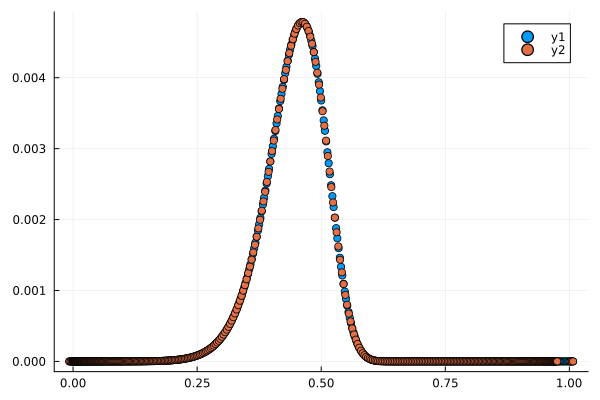

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

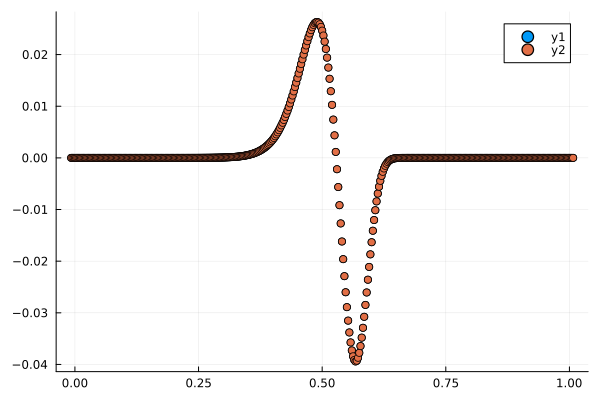

In [417]:
scatter([x1,x1],[y1,y2])